In [258]:
import os
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
data_path = "Data"
fig_path  = "Figs"

In [260]:
data1 = np.loadtxt(os.path.join(data_path, "B_diff_current_1.dat"))
data2 = np.loadtxt(os.path.join(data_path, "B_diff_current_2.dat"))
data3 = np.loadtxt(os.path.join(data_path, "B_diff_position_1.dat"))
data4 = np.loadtxt(os.path.join(data_path, "B_diff_position_2.dat"))
data5 = np.loadtxt(os.path.join(data_path, "B_diff_position_3.dat"))
data6 = np.loadtxt(os.path.join(data_path, "Angle_diff_current_1.dat"))
data7 = np.loadtxt(os.path.join(data_path, "Angle_diff_current_2.dat"))
data8 = np.loadtxt(os.path.join(data_path, "Angle_diff_current_3.dat"))
data9 = np.loadtxt(os.path.join(data_path, "Angle_diff_current_4.dat"))
sample1 = np.loadtxt(os.path.join(data_path, "sample1_C7H8.txt"))
sample2 = np.loadtxt(os.path.join(data_path, "sample2_C9H12.txt"))
sample3 = np.loadtxt(os.path.join(data_path, "sample3_CS2.txt"))

In [261]:
# Substract offset Magnetic field
data4[:,1] -= 1.8
data5[:,1] -= 1.8

# Index


## First session (15.11.2018)

* [Measuring magnetic field](#Magnetic-field-vs-Current)
* [Measuring Faraday effect](#Angle-vs-Intensity)

## Second session (22.11.2018)

* [Sample 3](#Sample-3)
* [Sample 2](#Sample-2)

## Third session (23.11.2018)

* [Sample 1](#Sample-1)

### Magnetic field vs Current
❗🚧 TODO: add fits to experimental data 🚧 ❗

In [5]:
spline1 = UnivariateSpline(data1[:,0], data1[:,1], k=3)
spline2 = UnivariateSpline(data2[:,0], data2[:,1], k=3)
x_spline1 = np.linspace(0, 20, 1000)
y_spline1 = spline1(x_spline1)
y_spline2 = spline2(x_spline1)

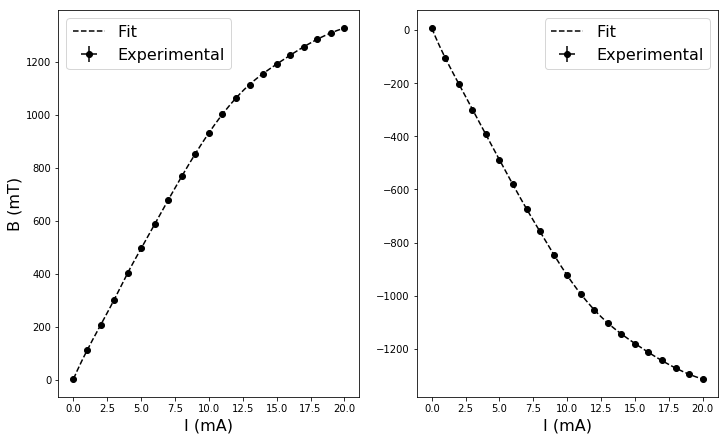

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6), constrained_layout=True)
ax1.errorbar(data1[:,0], data1[:,1], xerr=0.1, yerr=1, fmt='ko', label="Experimental")
ax2.errorbar(data2[:,0], data2[:,1], xerr=0.1, yerr=1, fmt='ko', label="Experimental")
ax1.plot(x_spline1, y_spline1, 'k--', label="Fit")
ax2.plot(x_spline1, y_spline2, 'k--', label="Fit")
ax1.set_xlabel('I (mA)', fontsize=16)
ax2.set_xlabel('I (mA)', fontsize=16)
ax1.set_ylabel('B (mT)', fontsize=16)
ax1.legend(loc=0, fontsize=16)
ax2.legend(loc=0, fontsize=16);

In [19]:
spline1(13)

array(1113.4949368)

In [20]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'B_diff_current.') + formato)

## Magnetic field vs Position
❗🚧 TODO: add fits to experimental data 🚧 ❗

In [21]:
spline3 = UnivariateSpline(data3[:,0], data3[:,1], k=3)
x_spline3 = np.linspace(1, 106, 1000)
y_spline3 = spline3(x_spline3)

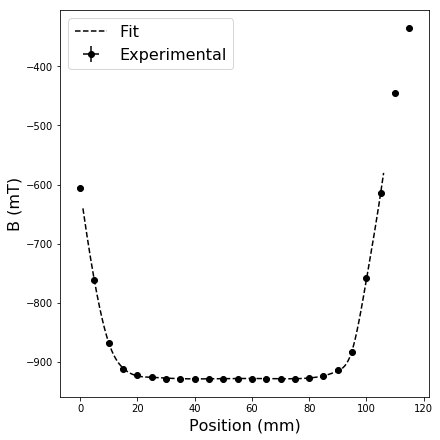

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,6), constrained_layout=True)
ax1.errorbar(data3[:,0], data3[:,1], xerr=1, yerr=1, fmt='ko', label="Experimental")
ax1.plot(x_spline3, y_spline3, 'k--', label="Fit")
ax1.set_xlabel('Position (mm)',fontsize=16)
ax1.set_ylabel('B (mT)', fontsize=16)
ax1.legend(loc=0, fontsize=16);

In [24]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'B_diff_position1.') + formato)

In [25]:
spline4 = UnivariateSpline(data4[:,0], data4[:,1], k=3, s=0.05)
spline5 = UnivariateSpline(data5[:,0], data5[:,1], k=3, s=0.05)
y_spline4 = spline4(x_spline3)
y_spline5 = spline5(x_spline3)

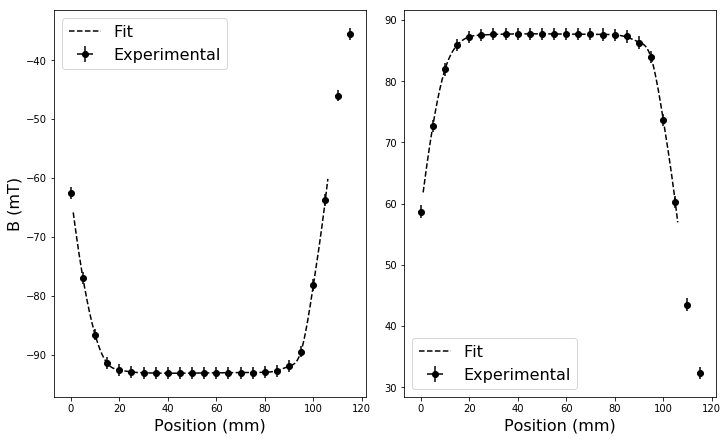

In [26]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,6), constrained_layout=True)
ax1.errorbar(data4[:,0], data4[:,1], xerr=1, yerr=1, fmt='ko', label="Experimental")
ax2.errorbar(data5[:,0], data5[:,1], xerr=1, yerr=1, fmt='ko', label="Experimental")
ax1.plot(x_spline3, y_spline4, 'k--', label="Fit")
ax2.plot(x_spline3, y_spline5, 'k--', label="Fit")
ax1.set_xlabel('Position (mm)', fontsize=16)
ax2.set_xlabel('Position (mm)', fontsize=16)
ax1.set_ylabel('B (mT)', fontsize=16)
ax1.legend(loc=0, fontsize=16)
ax2.legend(loc=0, fontsize=16);

In [28]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'B_diff_position2.') + formato)

---

Some functions and transformation for angles plots

In [29]:
def dms2dd(angle):
    degrees = angle[:, 0]
    minutes = angle[:, 1]
    seconds = angle[:, 2]
    dd = degrees + minutes/60 + seconds/3600
    return dd

def data2rad(data):
    rad = np.radians(dms2dd(data[:, 1:]))
    return np.concatenate((data[:, :1], np.reshape(rad, (data.shape[0], 1))), axis=1)

# Better implement other way to better take into account errorbars in the fit
def no_intercept(x, a):
    return a*x

In [30]:
# data7 and data8 intensity x1000 to get it in mA instead of A
data7[:,0] *= 1000
data8[:,0] *= 1000
# Degrees, minutes, seconds to radians
data6_rad = data2rad(data6)
data7_rad = data2rad(data7)
data8_rad = data2rad(data8)
data9_rad = data2rad(data9)

## Angle vs Intensity

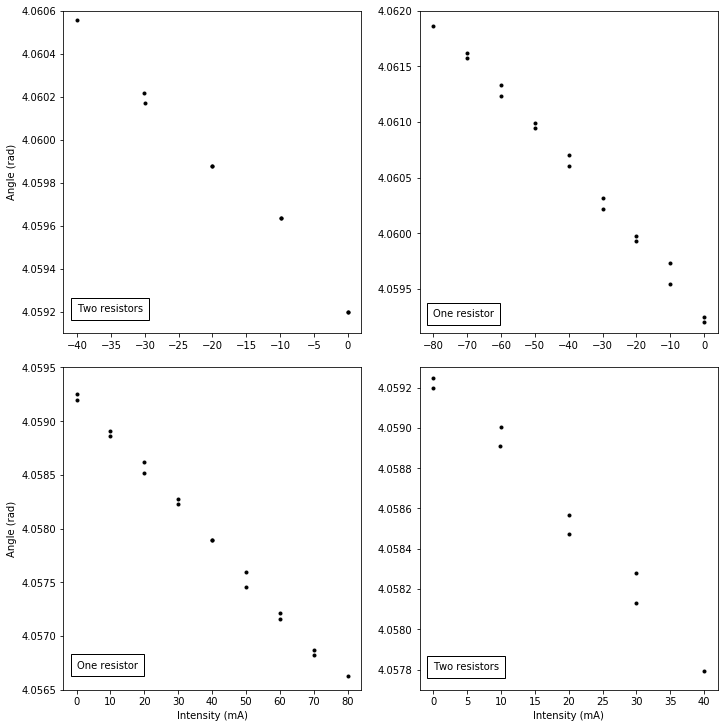

In [31]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)
ax1.plot(data6_rad[:,0], data6_rad[:,1], 'k.')
ax2.plot(data7_rad[:,0], data7_rad[:,1], 'k.')
ax3.plot(data8_rad[:,0], data8_rad[:,1], 'k.')
ax4.plot(data9_rad[:,0], data9_rad[:,1], 'k.')

ax3.set_xlabel('Intensity (mA)')
ax4.set_xlabel('Intensity (mA)')
ax1.set_ylabel('Angle (rad)')
ax3.set_ylabel('Angle (rad)')

ax1.set_ylim(4.0591, 4.0606)
ax2.set_ylim(4.0591, 4.0620)
ax3.set_ylim(4.0565, 4.0595)
ax4.set_ylim(4.0577, 4.0593)

ax1.text(-40, 4.0592, "Two resistors", bbox=dict(facecolor='white', boxstyle='Square', pad=.6))
ax2.text(-80, 4.05925, "One resistor", bbox=dict(facecolor='white', boxstyle='Square', pad=.6))
ax3.text(0, 4.0567, "One resistor", bbox=dict(facecolor='white', boxstyle='Square', pad=.6))
ax4.text(0, 4.0578, "Two resistors", bbox=dict(facecolor='white', boxstyle='Square', pad=.6));

In [32]:
#for formato in ("png", "pdf", "eps"):
#    fig.savefig(os.path.join(fig_path, 'Angle_diff_intensity.') + formato)

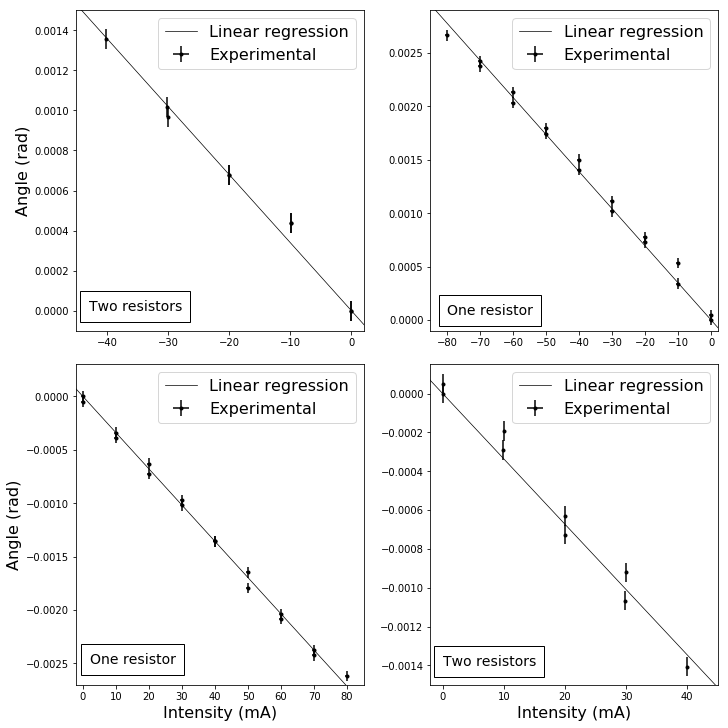

In [36]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)

ax1.errorbar(data6_rad[:,0], data6_rad[:,1] - data6_rad[0,1], xerr=.05, yerr=.00005, fmt='k.', label="Experimental")
ax2.errorbar(data7_rad[:,0], data7_rad[:,1] - data7_rad[0,1], xerr=.5, yerr=.00005, fmt='k.', label="Experimental")
ax3.errorbar(data8_rad[:,0], data8_rad[:,1] - data8_rad[0,1], xerr=.5, yerr=.00005, fmt='k.', label="Experimental")
ax4.errorbar(data9_rad[:,0], data9_rad[:,1] - data9_rad[0,1], xerr=.05, yerr=.00005, fmt='k.', label="Experimental")

x = np.linspace(-85,85,4)
popt1, pcov1 = curve_fit(no_intercept, data6_rad[:,0], data6_rad[:,1] - data6_rad[0,1])
popt2, pcov2 = curve_fit(no_intercept, data7_rad[:,0], data7_rad[:,1] - data7_rad[0,1])
popt3, pcov3 = curve_fit(no_intercept, data8_rad[:,0], data8_rad[:,1] - data8_rad[0,1])
popt4, pcov4 = curve_fit(no_intercept, data9_rad[:,0], data9_rad[:,1] - data9_rad[0,1])

ax1.plot(x, x*popt1, 'k-', linewidth=.7, label="Linear regression")
ax2.plot(x, x*popt2, 'k-', linewidth=.7, label="Linear regression")
ax3.plot(x, x*popt3, 'k-', linewidth=.7, label="Linear regression")
ax4.plot(x, x*popt4, 'k-', linewidth=.7, label="Linear regression")

ax3.set_xlabel('Intensity (mA)', fontsize=16)
ax4.set_xlabel('Intensity (mA)', fontsize=16)
ax1.set_ylabel('Angle (rad)', fontsize=16)
ax3.set_ylabel('Angle (rad)', fontsize=16)

ax1.set_ylim(-.0001, .0015)
ax2.set_ylim(-.0001, .0029)
ax3.set_ylim(-.0027, .0003)
ax4.set_ylim(-.0015, .00015)
ax1.set_xlim(-45, 2)
ax2.set_xlim(-85, 2)
ax3.set_xlim(-2, 85)
ax4.set_xlim(-2, 45)

ax1.text(-43, 0, "Two resistors", fontsize=14, bbox=dict(facecolor='white', boxstyle='Square', pad=.6))
ax2.text(-80, 0.00005, "One resistor", fontsize=14, bbox=dict(facecolor='white', boxstyle='Square', pad=.6))
ax3.text(2, -.0025, "One resistor", fontsize=14, bbox=dict(facecolor='white', boxstyle='Square', pad=.6))
ax4.text(0, -.0014, "Two resistors", fontsize=14, bbox=dict(facecolor='white', boxstyle='Square', pad=.6))

ax1.legend(fontsize=16)
ax2.legend(fontsize=16)
ax3.legend(fontsize=16)
ax4.legend(fontsize=16);

In [37]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'Angle_diff_intensity2.') + formato)

Obtained values and uncertainties for the modified Verdet constant

In [38]:
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
perr4 = np.sqrt(np.diag(pcov4))

print(popt1, perr1)
print(popt2, perr2)
print(popt3, perr3)
print(popt4, perr4)

[-3.39881953e-05] [7.98517157e-07]
[-3.47543761e-05] [3.98684421e-07]
[-3.39369577e-05] [2.61394019e-07]
[-3.36365556e-05] [1.12266897e-06]


## Sample 3

Carbon disulfide (CS$_2$)

❗🚧 TODO: All analysis 🚧 ❗

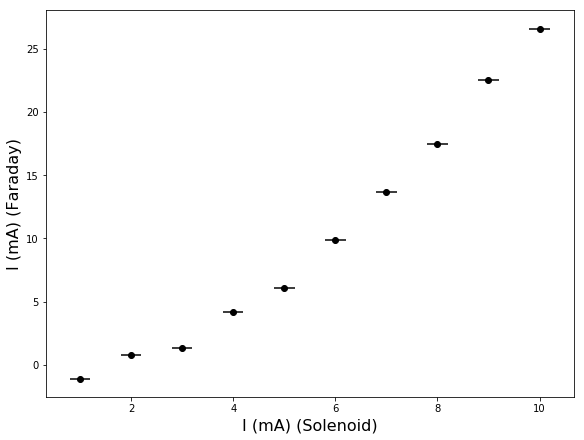

In [39]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)
ax1.errorbar(sample3[:,0], sample3[:,1], xerr=0.2, yerr=0.05, fmt='ko')
ax1.set_xlabel('I (mA) (Solenoid)', fontsize=16)
ax1.set_ylabel('I (mA) (Faraday)', fontsize=16);

In [40]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'sample3.') + formato)

## Sample 2

Mesitylene (C$_9$H$_{12}$)

❗🚧 TODO: All analysis 🚧 ❗

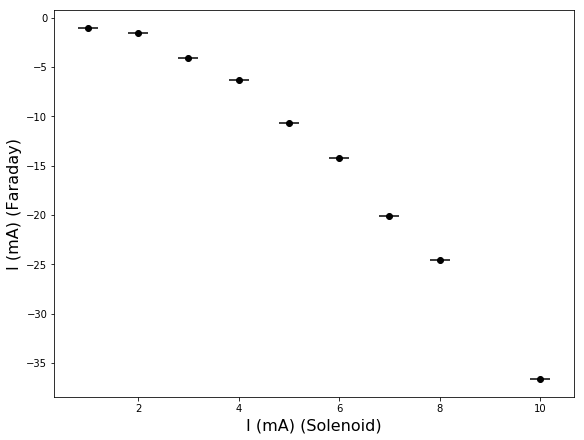

In [41]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)
ax1.errorbar(sample2[:,0], sample2[:,1], xerr=0.2, yerr=0.05, fmt='ko')
ax1.set_xlabel('I (mA) (Solenoid)', fontsize=16)
ax1.set_ylabel('I (mA) (Faraday)', fontsize=16);

In [42]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'sample2.') + formato)

## Sample 1

Toluene (C$_7$H$_8$)

❗🚧 TODO: All analysis 🚧 ❗

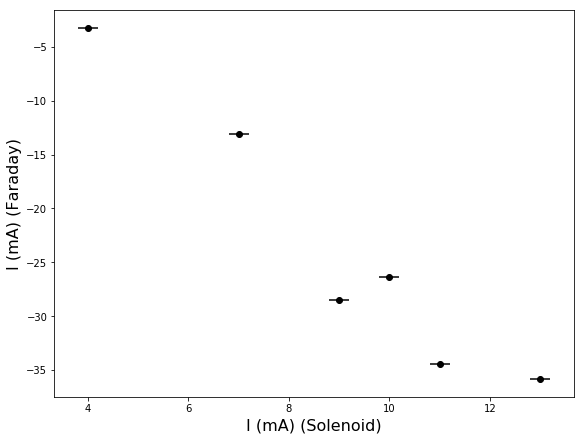

In [43]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)
ax1.errorbar(sample1[:,0], sample1[:,1], xerr=0.2, yerr=0.05, fmt='ko')
ax1.set_xlabel('I (mA) (Solenoid)', fontsize=16)
ax1.set_ylabel('I (mA) (Faraday)', fontsize=16);

In [44]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'sample1.') + formato)

---

Some constants we need to do the calculations:

* $\lambda=632.8$ nm
* $L=10$ cm
* $V'=-3.39\times10^{-5}$ rad/mA

In [125]:
laser = 632.8e-9
L = 0.1
V = -3.39e-5

\$\Delta n=\frac{1}{\pi}\frac{\lambda}{L}\tilde{V}I_F$

In [281]:
delta_n_3 = 1/np.pi * laser/L * V * sample3[:,1]
delta_n_2 = 1/np.pi * laser/L * V * sample2[:,1]
delta_n_1 = 1/np.pi * laser/L * V * sample1[:,1]
B_3 = spline1(sample3[:,0]) #mT
B_2 = spline1(sample2[:,0]) #mT
B_1 = spline1(sample1[:,0]) #mT

In [290]:
d_delta_n_3 = laser/np.pi/L*(sample3[:,1] * .03e-5 + V * .05)
d_delta_n_2 = laser/np.pi/L*(sample2[:,1] * .03e-5 + V * .05)
d_delta_n_1 = laser/np.pi/L*(sample1[:,1] * .03e-5 + V * .05)

In [127]:
x = np.linspace(0.01,1.2,4)
#sample3_fit, sample3_cov = curve_fit(no_intercept, B_3**2/1e6, delta_n_3*1e7)
#sample2_fit, sample2_cov = curve_fit(no_intercept, B_2**2/1e6, delta_n_2*1e7)
#sample1_fit, sample1_cov = curve_fit(no_intercept, B_1**2/1e6, delta_n_1*1e7)

In [136]:
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(B_3**2/1e6, delta_n_3)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(B_2**2/1e6, delta_n_2)
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(B_1**2/1e6, delta_n_1)

In [129]:
#chi_squared_3 = np.sum((intercept_3 + B_3**2/1e6 * + slope_3 * B_3**2/1e6 - delta_n_3*1e7) ** 2)
#chi_squared_2 = np.sum((intercept_2 + B_2**2/1e6 * + slope_2 * B_2**2/1e6 - delta_n_2*1e7) ** 2)
#chi_squared_1 = np.sum((intercept_1 + B_1**2/1e6 * + slope_1 * B_1**2/1e6 - delta_n_1*1e7) ** 2)

In [130]:
#print(chi_squared_3)
#print(chi_squared_2)
#print(chi_squared_1)

In [166]:
print(slope_3)
print(slope_2)
print(slope_1)

-2.1996828196593465e-09
2.8715845667030124e-09
2.1832705908378057e-09


In [131]:
print(r_value_3**2)
print(r_value_2**2)
print(r_value_1**2)

0.9985524935579977
0.9987250121150116
0.9322159988179135


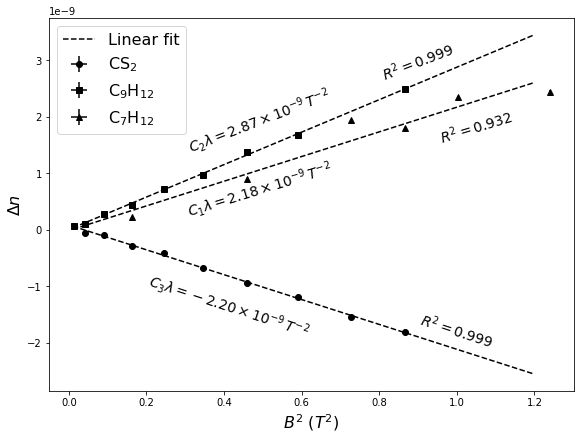

In [296]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)

ax1.errorbar(B_3**2/1e6, delta_n_3, xerr=0, yerr=d_delta_n_3, fmt='ko', label=u"CS$_2$")
ax1.errorbar(B_2**2/1e6, delta_n_2, xerr=0, yerr=d_delta_n_2, fmt='ks', label=u"C$_9$H$_{12}$")
ax1.errorbar(B_1**2/1e6, delta_n_1, xerr=0, yerr=d_delta_n_1, fmt='k^', label=u"C$_7$H$_{12}$")

#ax1.plot(x, x*sample3_fit, 'k-', linewidth=.7, label="Linear fit")
#ax1.plot(x, x*sample2_fit, 'k-', linewidth=.7)
#ax1.plot(x, x*sample1_fit, 'k-', linewidth=.7)

ax1.plot(x, intercept_3 + x*slope_3, 'k--', label='Linear fit')
ax1.plot(x, intercept_2 + x*slope_2, 'k--')
ax1.plot(x, intercept_1 + x*slope_1, 'k--')

ax1.text(.9,-1.7e-9,u'$R^2=${:.3f}'.format(r_value_3**2), fontsize=14, rotation=-18)
ax1.text(.8,3.1e-9,u'$R^2=${:.3f}'.format(r_value_2**2), fontsize=14, rotation=21)
ax1.text(0.95,1.9e-9,u'$R^2=${:.3f}'.format(r_value_1**2), fontsize=14, rotation=17)
ax1.text(.2,-1e-9,r'$C_3\lambda=%.2f \times 10^{-9}\,T^{-2}$' % (slope_3*1e9), fontsize=14, rotation=-18)
ax1.text(.3,2.3e-9,r'$C_2\lambda=%.2f \times 10^{-9}\,T^{-2}$' % (slope_2*1e9), fontsize=14, rotation=21)
ax1.text(.3,1e-9,r'$C_1\lambda=%.2f \times 10^{-9}\,T^{-2}$' % (slope_1*1e9), fontsize=14, rotation=17)

ax1.set_xlabel(u'$B^2$ ($T^2$)', fontsize=16)
ax1.set_ylabel(r'$\Delta n$', fontsize=16)
ax1.legend(loc=0, fontsize=16);

In [297]:
for formato in ("png", "pdf", "eps"):
    fig.savefig(os.path.join(fig_path, 'CM_consts.') + formato)

In [302]:
print(std_err_3/laser*1e3)
print(std_err_2/laser*1e3)
print(std_err_1/laser*1e3)

0.04679219316326669
0.0612824593561291
0.46517506078861315
